In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [35]:
train_image_dir="/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/image/train/"
test_image_dir="/Users/withmocha/Desktop/DATA/Capston Design(2024)/deep voice data/image/test/"

In [36]:
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

In [37]:
train_generator = train_datagen.flow_from_directory(
    train_image_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_image_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='binary')

Found 3564 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [38]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=base_model.input, outputs=predictions)

In [39]:
for layer in base_model.layers:
    layer.trainable = False

In [42]:
import tensorflow as tf

In [43]:
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/100


/opt/anaconda3/envs/conda_cpu/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5901 - loss: 0.6671 - val_accuracy: 0.8300 - val_loss: 0.5848
Epoch 2/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:13 752ms/step - accuracy: 0.7500 - loss: 0.6122

2024-05-15 21:07:06.783894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/envs/conda_cpu/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.6122 - val_accuracy: 0.5000 - val_loss: 0.6538
Epoch 3/100


2024-05-15 21:07:07.114565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8357 - loss: 0.5776 - val_accuracy: 0.9200 - val_loss: 0.5107
Epoch 4/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:22 806ms/step - accuracy: 0.9000 - loss: 0.5473

2024-05-15 21:10:53.388894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.5473 - val_accuracy: 0.7500 - val_loss: 0.5290
Epoch 5/100


2024-05-15 21:10:53.713860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8600 - loss: 0.5214 - val_accuracy: 0.9200 - val_loss: 0.4537
Epoch 6/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:10 737ms/step - accuracy: 0.9500 - loss: 0.4541

2024-05-15 21:14:15.259201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.4541 - val_accuracy: 0.8750 - val_loss: 0.4919
Epoch 7/100


2024-05-15 21:14:15.576385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 835s 5s/step - accuracy: 0.8752 - loss: 0.4696 - val_accuracy: 0.9200 - val_loss: 0.4144
Epoch 8/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:19 789ms/step - accuracy: 0.8500 - loss: 0.4901

2024-05-15 21:28:11.308547: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.4901 - val_accuracy: 1.0000 - val_loss: 0.3082
Epoch 9/100


2024-05-15 21:28:11.665880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 156s 872ms/step - accuracy: 0.8990 - loss: 0.4299 - val_accuracy: 0.9200 - val_loss: 0.3766
Epoch 10/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:36 884ms/step - accuracy: 0.9500 - loss: 0.3520

2024-05-15 21:30:48.324497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.3520 - val_accuracy: 1.0000 - val_loss: 0.3121
Epoch 11/100


2024-05-15 21:30:48.709860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9008 - loss: 0.3955 - val_accuracy: 0.9250 - val_loss: 0.3479
Epoch 12/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:44 927ms/step - accuracy: 1.0000 - loss: 0.3000

2024-05-15 21:33:50.836890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.3000 - val_accuracy: 0.6250 - val_loss: 0.5094
Epoch 13/100


2024-05-15 21:33:51.238123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.9016 - loss: 0.3775 - val_accuracy: 0.9200 - val_loss: 0.3215
Epoch 14/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:51 967ms/step - accuracy: 0.9000 - loss: 0.3281

2024-05-15 21:36:57.830414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9000 - loss: 0.3281 - val_accuracy: 1.0000 - val_loss: 0.2667
Epoch 15/100


2024-05-15 21:36:58.248376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9025 - loss: 0.3532 - val_accuracy: 0.9200 - val_loss: 0.3007
Epoch 16/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.9000 - loss: 0.3504

2024-05-15 21:40:06.799822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9000 - loss: 0.3504 - val_accuracy: 1.0000 - val_loss: 0.2757
Epoch 17/100


2024-05-15 21:40:07.289317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9076 - loss: 0.3309 - val_accuracy: 0.9300 - val_loss: 0.2794
Epoch 18/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:50 963ms/step - accuracy: 0.8000 - loss: 0.4252

2024-05-15 21:43:21.617679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8000 - loss: 0.4252 - val_accuracy: 0.8750 - val_loss: 0.3026
Epoch 19/100


2024-05-15 21:43:22.027396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9181 - loss: 0.3104 - val_accuracy: 0.9300 - val_loss: 0.2632
Epoch 20/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:47 946ms/step - accuracy: 0.9000 - loss: 0.2848

2024-05-15 21:46:27.825965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9000 - loss: 0.2848 - val_accuracy: 0.7500 - val_loss: 0.3824
Epoch 21/100


2024-05-15 21:46:28.229934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9170 - loss: 0.3004 - val_accuracy: 0.9450 - val_loss: 0.2510
Epoch 22/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:53 978ms/step - accuracy: 0.9000 - loss: 0.2993

2024-05-15 21:49:40.354306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9000 - loss: 0.2993 - val_accuracy: 1.0000 - val_loss: 0.2116
Epoch 23/100


2024-05-15 21:49:40.783234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.9217 - loss: 0.2845 - val_accuracy: 0.9500 - val_loss: 0.2320
Epoch 24/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:53 980ms/step - accuracy: 1.0000 - loss: 0.2001

2024-05-15 21:52:47.387055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.2001 - val_accuracy: 0.7500 - val_loss: 0.3967
Epoch 25/100


2024-05-15 21:52:47.805395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9242 - loss: 0.2738 - val_accuracy: 0.9350 - val_loss: 0.2390
Epoch 26/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:47 945ms/step - accuracy: 0.9500 - loss: 0.3000

2024-05-15 21:55:53.382954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.3000 - val_accuracy: 1.0000 - val_loss: 0.1459
Epoch 27/100


2024-05-15 21:55:53.777854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9317 - loss: 0.2641 - val_accuracy: 0.9500 - val_loss: 0.2204
Epoch 28/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:52 974ms/step - accuracy: 0.9500 - loss: 0.2031

2024-05-15 21:58:55.568986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9500 - loss: 0.2031 - val_accuracy: 1.0000 - val_loss: 0.1303
Epoch 29/100


2024-05-15 21:58:55.981764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9299 - loss: 0.2549 - val_accuracy: 0.9600 - val_loss: 0.2001
Epoch 30/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:42 920ms/step - accuracy: 0.9500 - loss: 0.2716

2024-05-15 22:02:15.365298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.2716 - val_accuracy: 0.8750 - val_loss: 0.3919
Epoch 31/100


2024-05-15 22:02:15.752000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9350 - loss: 0.2360 - val_accuracy: 0.9500 - val_loss: 0.1913
Epoch 32/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 3:06 1s/step - accuracy: 1.0000 - loss: 0.1197

2024-05-15 22:05:26.257685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.1197 - val_accuracy: 1.0000 - val_loss: 0.2529
Epoch 33/100


2024-05-15 22:05:26.697203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9357 - loss: 0.2359 - val_accuracy: 0.9600 - val_loss: 0.1864
Epoch 34/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:39 900ms/step - accuracy: 0.9000 - loss: 0.2625

2024-05-15 22:08:34.516773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.2625 - val_accuracy: 1.0000 - val_loss: 0.1651
Epoch 35/100


2024-05-15 22:08:34.906033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 171s 957ms/step - accuracy: 0.9316 - loss: 0.2319 - val_accuracy: 0.9550 - val_loss: 0.1840
Epoch 36/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:35 878ms/step - accuracy: 0.9500 - loss: 0.2074

2024-05-15 22:11:26.751235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.2074 - val_accuracy: 1.0000 - val_loss: 0.2085
Epoch 37/100


2024-05-15 22:11:27.139832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 168s 942ms/step - accuracy: 0.9442 - loss: 0.2165 - val_accuracy: 0.9500 - val_loss: 0.1857
Epoch 38/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:45 937ms/step - accuracy: 1.0000 - loss: 0.1516

2024-05-15 22:14:16.265121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1516 - val_accuracy: 1.0000 - val_loss: 0.1229
Epoch 39/100


2024-05-15 22:14:16.653788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 168s 940ms/step - accuracy: 0.9414 - loss: 0.2061 - val_accuracy: 0.9600 - val_loss: 0.1693
Epoch 40/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:40 906ms/step - accuracy: 0.8500 - loss: 0.3786

2024-05-15 22:17:05.511396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3786 - val_accuracy: 0.8750 - val_loss: 0.2661
Epoch 41/100


2024-05-15 22:17:05.960541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 171s 953ms/step - accuracy: 0.9465 - loss: 0.1990 - val_accuracy: 0.9650 - val_loss: 0.1582
Epoch 42/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:38 893ms/step - accuracy: 0.9500 - loss: 0.1655

2024-05-15 22:19:57.614606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1655 - val_accuracy: 1.0000 - val_loss: 0.1736
Epoch 43/100


2024-05-15 22:19:58.002786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 176s 988ms/step - accuracy: 0.9487 - loss: 0.1970 - val_accuracy: 0.9850 - val_loss: 0.1458
Epoch 44/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:42 916ms/step - accuracy: 1.0000 - loss: 0.1134

2024-05-15 22:22:55.313072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1134 - val_accuracy: 0.8750 - val_loss: 0.3090
Epoch 45/100


2024-05-15 22:22:55.710561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 177s 990ms/step - accuracy: 0.9510 - loss: 0.1830 - val_accuracy: 0.9550 - val_loss: 0.1595
Epoch 46/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:48 951ms/step - accuracy: 1.0000 - loss: 0.1220

2024-05-15 22:25:53.264842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.1220 - val_accuracy: 1.0000 - val_loss: 0.2079
Epoch 47/100


2024-05-15 22:25:53.680345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 173s 971ms/step - accuracy: 0.9542 - loss: 0.1842 - val_accuracy: 0.9550 - val_loss: 0.1562
Epoch 48/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:39 899ms/step - accuracy: 1.0000 - loss: 0.1069

2024-05-15 22:28:47.993481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1069 - val_accuracy: 1.0000 - val_loss: 0.0749
Epoch 49/100


2024-05-15 22:28:48.386761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 176s 987ms/step - accuracy: 0.9502 - loss: 0.1861 - val_accuracy: 0.9700 - val_loss: 0.1378
Epoch 50/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:38 893ms/step - accuracy: 0.9500 - loss: 0.1423

2024-05-15 22:31:45.508920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1423 - val_accuracy: 0.8750 - val_loss: 0.2773
Epoch 51/100


2024-05-15 22:31:45.893484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 173s 971ms/step - accuracy: 0.9540 - loss: 0.1749 - val_accuracy: 0.9550 - val_loss: 0.1581
Epoch 52/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:39 900ms/step - accuracy: 1.0000 - loss: 0.1612

2024-05-15 22:34:40.037663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1612 - val_accuracy: 0.8750 - val_loss: 0.3314
Epoch 53/100


2024-05-15 22:34:40.423868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 177s 990ms/step - accuracy: 0.9571 - loss: 0.1747 - val_accuracy: 0.9650 - val_loss: 0.1377
Epoch 54/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:39 901ms/step - accuracy: 1.0000 - loss: 0.1129

2024-05-15 22:37:38.009725: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1129 - val_accuracy: 1.0000 - val_loss: 0.0427
Epoch 55/100


2024-05-15 22:37:38.406866: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 172s 964ms/step - accuracy: 0.9547 - loss: 0.1724 - val_accuracy: 0.9800 - val_loss: 0.1215
Epoch 56/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:36 885ms/step - accuracy: 0.9500 - loss: 0.1838

2024-05-15 22:40:31.469685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1838 - val_accuracy: 1.0000 - val_loss: 0.2036
Epoch 57/100


2024-05-15 22:40:31.855628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 168s 939ms/step - accuracy: 0.9510 - loss: 0.1693 - val_accuracy: 0.9700 - val_loss: 0.1293
Epoch 58/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:34 872ms/step - accuracy: 0.9500 - loss: 0.1413

2024-05-15 22:43:20.504271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1413 - val_accuracy: 1.0000 - val_loss: 0.0668
Epoch 59/100


2024-05-15 22:43:20.884133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 173s 968ms/step - accuracy: 0.9602 - loss: 0.1597 - val_accuracy: 0.9850 - val_loss: 0.1144
Epoch 60/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:40 907ms/step - accuracy: 0.9000 - loss: 0.2402

2024-05-15 22:46:14.605126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.2402 - val_accuracy: 0.8750 - val_loss: 0.2006
Epoch 61/100


2024-05-15 22:46:14.998050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 176s 985ms/step - accuracy: 0.9559 - loss: 0.1605 - val_accuracy: 0.9800 - val_loss: 0.1157
Epoch 62/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:45 935ms/step - accuracy: 0.8500 - loss: 0.2623

2024-05-15 22:49:11.843259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8500 - loss: 0.2623 - val_accuracy: 1.0000 - val_loss: 0.1075
Epoch 63/100


2024-05-15 22:49:12.244237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 175s 982ms/step - accuracy: 0.9585 - loss: 0.1599 - val_accuracy: 0.9650 - val_loss: 0.1298
Epoch 64/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:42 915ms/step - accuracy: 0.9500 - loss: 0.1699

2024-05-15 22:52:08.541908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1699 - val_accuracy: 1.0000 - val_loss: 0.0602
Epoch 65/100


2024-05-15 22:52:08.946666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 176s 986ms/step - accuracy: 0.9605 - loss: 0.1505 - val_accuracy: 0.9800 - val_loss: 0.1064
Epoch 66/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:40 904ms/step - accuracy: 0.9500 - loss: 0.1213

2024-05-15 22:55:05.965401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1213 - val_accuracy: 1.0000 - val_loss: 0.1248
Epoch 67/100


2024-05-15 22:55:06.371590: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 173s 971ms/step - accuracy: 0.9596 - loss: 0.1504 - val_accuracy: 0.9800 - val_loss: 0.1064
Epoch 68/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:38 895ms/step - accuracy: 0.9500 - loss: 0.1854

2024-05-15 22:58:00.703318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1854 - val_accuracy: 1.0000 - val_loss: 0.1222
Epoch 69/100


2024-05-15 22:58:01.088844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 175s 979ms/step - accuracy: 0.9619 - loss: 0.1456 - val_accuracy: 0.9800 - val_loss: 0.0996
Epoch 70/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:35 881ms/step - accuracy: 1.0000 - loss: 0.1098

2024-05-15 23:00:56.696938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1098 - val_accuracy: 1.0000 - val_loss: 0.1229
Epoch 71/100


2024-05-15 23:00:57.076985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 171s 956ms/step - accuracy: 0.9578 - loss: 0.1518 - val_accuracy: 0.9800 - val_loss: 0.0989
Epoch 72/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:37 892ms/step - accuracy: 0.9500 - loss: 0.1217

2024-05-15 23:03:48.628166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1217 - val_accuracy: 1.0000 - val_loss: 0.0732
Epoch 73/100


2024-05-15 23:03:49.017642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9651 - loss: 0.1389 - val_accuracy: 0.9800 - val_loss: 0.1021
Epoch 74/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:57 1s/step - accuracy: 0.9500 - loss: 0.1400

2024-05-15 23:06:48.558821: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9500 - loss: 0.1400 - val_accuracy: 1.0000 - val_loss: 0.1119
Epoch 75/100


2024-05-15 23:06:49.009029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9690 - loss: 0.1331 - val_accuracy: 0.9750 - val_loss: 0.1123
Epoch 76/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:39 904ms/step - accuracy: 1.0000 - loss: 0.1238

2024-05-15 23:09:49.028176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1238 - val_accuracy: 1.0000 - val_loss: 0.0738
Epoch 77/100


2024-05-15 23:09:49.409844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9667 - loss: 0.1366 - val_accuracy: 0.9800 - val_loss: 0.0999
Epoch 78/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:46 943ms/step - accuracy: 1.0000 - loss: 0.0778

2024-05-15 23:13:02.534763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0778 - val_accuracy: 1.0000 - val_loss: 0.1143
Epoch 79/100


2024-05-15 23:13:02.931520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9644 - loss: 0.1375 - val_accuracy: 0.9800 - val_loss: 0.1004
Epoch 80/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:42 916ms/step - accuracy: 1.0000 - loss: 0.0570

2024-05-15 23:16:02.621488: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0570 - val_accuracy: 1.0000 - val_loss: 0.0723
Epoch 81/100


2024-05-15 23:16:03.029944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9731 - loss: 0.1249 - val_accuracy: 0.9900 - val_loss: 0.0853
Epoch 82/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:40 905ms/step - accuracy: 1.0000 - loss: 0.0558

2024-05-15 23:19:06.067187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 0.0943
Epoch 83/100


2024-05-15 23:19:06.454557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9714 - loss: 0.1227 - val_accuracy: 0.9950 - val_loss: 0.0853
Epoch 84/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:46 941ms/step - accuracy: 0.9500 - loss: 0.0820

2024-05-15 23:22:06.472738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.0820 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 85/100


2024-05-15 23:22:06.872555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 178s 1000ms/step - accuracy: 0.9663 - loss: 0.1252 - val_accuracy: 0.9800 - val_loss: 0.0989
Epoch 86/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:43 925ms/step - accuracy: 1.0000 - loss: 0.0967

2024-05-15 23:25:06.303918: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0967 - val_accuracy: 0.8750 - val_loss: 0.1204
Epoch 87/100


2024-05-15 23:25:06.702674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9643 - loss: 0.1261 - val_accuracy: 0.9800 - val_loss: 0.0825
Epoch 88/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:48 952ms/step - accuracy: 1.0000 - loss: 0.0771

2024-05-15 23:28:10.128131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0771 - val_accuracy: 1.0000 - val_loss: 0.0520
Epoch 89/100


2024-05-15 23:28:10.529601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9691 - loss: 0.1226 - val_accuracy: 1.0000 - val_loss: 0.0796
Epoch 90/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:50 961ms/step - accuracy: 0.9500 - loss: 0.1479

2024-05-15 23:31:14.103865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9500 - loss: 0.1479 - val_accuracy: 1.0000 - val_loss: 0.0652
Epoch 91/100


2024-05-15 23:31:14.646175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9725 - loss: 0.1263 - val_accuracy: 0.9800 - val_loss: 0.0923
Epoch 92/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:45 936ms/step - accuracy: 1.0000 - loss: 0.1069

2024-05-15 23:34:17.427683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.1069 - val_accuracy: 1.0000 - val_loss: 0.0914
Epoch 93/100


2024-05-15 23:34:17.825519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9765 - loss: 0.1104 - val_accuracy: 0.9800 - val_loss: 0.0912
Epoch 94/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:51 969ms/step - accuracy: 1.0000 - loss: 0.0907

2024-05-15 23:37:19.817907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0907 - val_accuracy: 1.0000 - val_loss: 0.0400
Epoch 95/100


2024-05-15 23:37:20.220245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9719 - loss: 0.1176 - val_accuracy: 0.9800 - val_loss: 0.0875
Epoch 96/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:45 933ms/step - accuracy: 0.9000 - loss: 0.1695

2024-05-15 23:40:19.937068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9000 - loss: 0.1695 - val_accuracy: 1.0000 - val_loss: 0.0728
Epoch 97/100


2024-05-15 23:40:20.335051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9756 - loss: 0.1114 - val_accuracy: 0.9800 - val_loss: 0.0777
Epoch 98/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:49 956ms/step - accuracy: 1.0000 - loss: 0.0930

2024-05-15 23:43:26.143819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0930 - val_accuracy: 1.0000 - val_loss: 0.0593
Epoch 99/100


2024-05-15 23:43:26.543085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9719 - loss: 0.1129 - val_accuracy: 0.9800 - val_loss: 0.0774
Epoch 100/100
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:50 965ms/step - accuracy: 0.9500 - loss: 0.1502

2024-05-15 23:46:35.784165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1502 - val_accuracy: 1.0000 - val_loss: 0.0305


2024-05-15 23:46:36.193928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


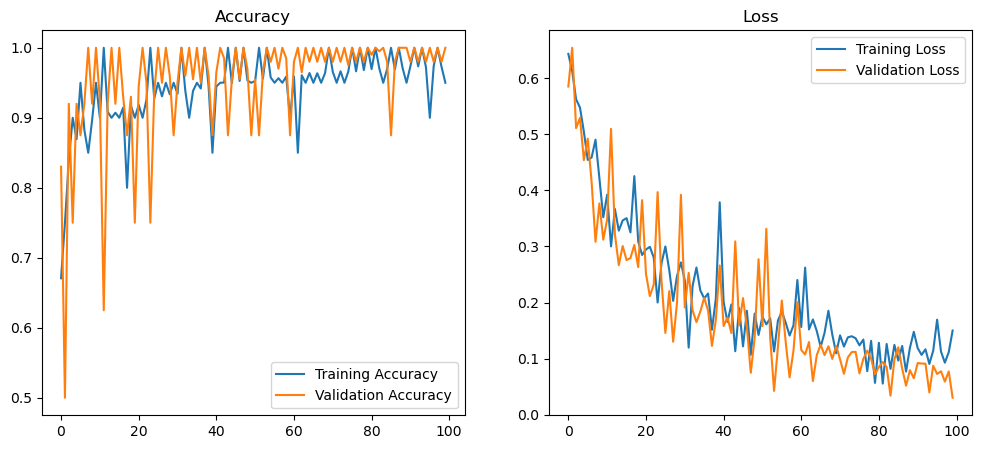

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [47]:
predictions = model.predict(validation_generator)
predicted_classes = np.where(predictions > 0.5, 1, 0)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step 


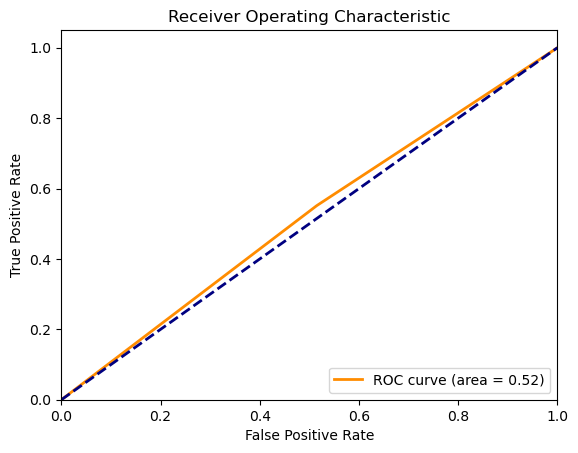

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
import numpy as np


fpr, tpr, _ = roc_curve(true_classes, predicted_classes)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

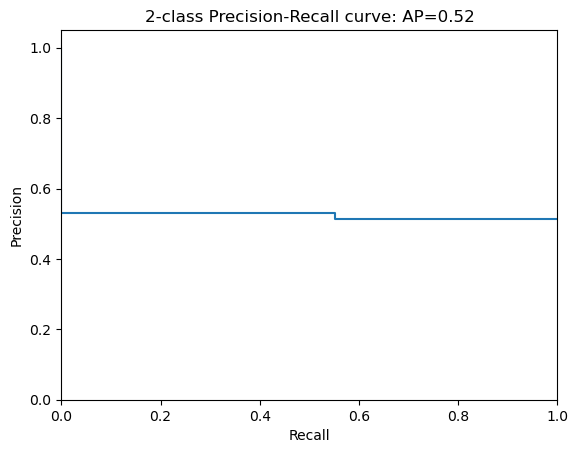

In [49]:
precision, recall, _ = precision_recall_curve(true_classes, predicted_classes)
average_precision = average_precision_score(true_classes, predicted_classes)

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

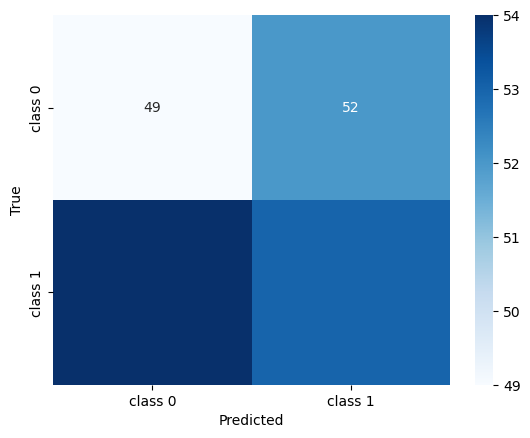

              precision    recall  f1-score   support

     class 0       0.48      0.49      0.48       101
     class 1       0.50      0.50      0.50       107

    accuracy                           0.49       208
   macro avg       0.49      0.49      0.49       208
weighted avg       0.49      0.49      0.49       208



In [46]:


conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(true_classes, predicted_classes, target_names=class_labels))